In [5]:
import pandas as pd # imports pandas for data structure support
from sklearn import datasets # imports built in data sets supported in scikit learn 
from sklearn import tree   # imports Decision tree classifier
from sklearn import metrics # imports performance metrices
from sklearn.model_selection import train_test_split # using scikit learn for hold-out

In [3]:
iris = datasets.load_iris() 

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
# Creating hold-out enviornment

irisdata_train, irisdata_test, iristarget_train, iristarget_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [11]:
print(iristarget_test)

[2 0 2 1 2 0 0 0 1 0 1 0 0 2 0 2 0 1 1 2 2 1 0 0 0 2 1 1 2 2 2 2 2 0 1 1 1
 2 1 1 2 0 1 2 1]


In [12]:
#Create a Decision tree Classifier

DTmodel_1 = tree.DecisionTreeClassifier() 

#Train the model using the training sets

DTfitted_1 = DTmodel_1.fit(irisdata_train, iristarget_train)

In [14]:
DT_predictions_1 = DTfitted_1.predict((irisdata_test))

In [17]:
# Computing Model Accuracy

print("Accuracy:",round(metrics.accuracy_score(iristarget_test, DT_predictions_1),2) * 100, "%")

print ("---------------")

# Printing confusion matrix

print ("Confusion matrix")

print ("---------------")

print(metrics.confusion_matrix(iristarget_test, DT_predictions_1))

# Model detailed classification report
target_names = ['class 0', 'class 1', 'class 2']


print ("---------------")

print("Classification report", metrics.classification_report(iristarget_test, DT_predictions_1,target_names =target_names))

Accuracy: 96.0 %
---------------
Confusion matrix
---------------
[[14  0  0]
 [ 0 15  0]
 [ 0  2 14]]
---------------
Classification report               precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        14
     class 1       0.88      1.00      0.94        15
     class 2       1.00      0.88      0.93        16

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [19]:
# importing libraries

from IPython.display import Image  
import pydotplus

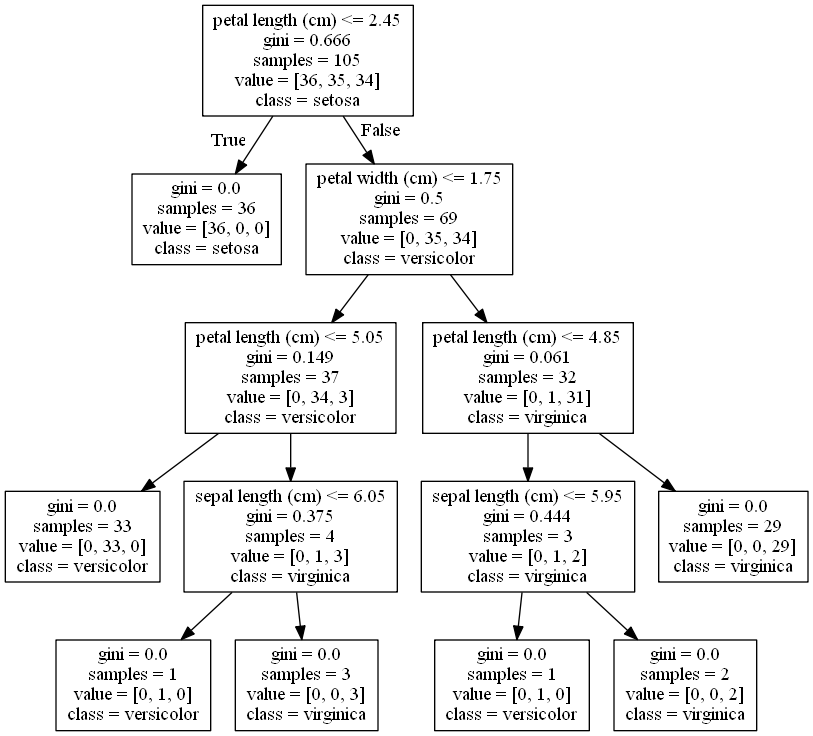

In [20]:
# Create DOT data. The first argument in tree.export_graphviz is the model name, out_file is used to write 
# model into out_file, next parameters are information on indicator and predictive parameters 

dot_data = tree.export_graphviz(DTmodel_1, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)

# Draw graph

graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())